In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('animals.csv') 
df.head()

,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,Federal Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
0,Albany,Animal,Birds,Sparrows and Towhees,Ammodramus henslowii,Henslow's Sparrow,1992,Threatened,not listed,S3B,G4,Recently Confirmed
1,Albany,Animal,Birds,"Gulls, Terns, Plovers, Shorebirds",Bartramia longicauda,Upland Sandpiper,1983,Threatened,not listed,S3B,G5,Recently Confirmed
2,Albany,Animal,Birds,"Hawks, Falcons, Eagles, Vultures",Circus hudsonius,Northern Harrier,2002,Threatened,not listed,"S3B,S3N",G5,Recently Confirmed
3,Albany,Animal,Birds,Wrens,Cistothorus platensis,Sedge Wren,1991,Threatened,not listed,S3B,G5,Historically Confirmed
4,Albany,Animal,Birds,"Hawks, Falcons, Eagles, Vultures",Haliaeetus leucocephalus,Bald Eagle,2021,Threatened,not listed,"S2S3B,S2N",G5,Recently Confirmed


In [5]:
df.isnull().sum()

County                      0
Category                    0
Taxonomic Group             0
Taxonomic Subgroup          0
Scientific Name             0
Common Name                 0
Year Last Documented        0
NY Listing Status           0
Federal Listing Status      0
State Conservation Rank     0
Global Conservation Rank    0
Distribution Status         0
dtype: int64

In [11]:
df['County'].unique()

array(['Albany', 'Allegany', 'Atlantic Ocean and Long Island Sound',
       'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua',
       'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland',
       'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton',
       'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings',
       'Lake Erie Open Waters', 'Lake Ontario Open Waters', 'Lewis',
       'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau',
       'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens', 'Rensselaer',
       'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie',
       'Schuyler', 'Seneca', 'Steuben', 'St. Lawrence', 'Suffolk',
       'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren', 'Washington',
       'Wayne', 'Westchester', 'Wyoming', 'Yates'], dtype=object)

In [55]:
df['Taxonomic Group'].unique()

array(['Birds', 'Butterflies and Moths', 'Ferns and Fern Allies',
       'Flowering Plants', 'Mammals', 'Reptiles', 'Fish',
       'Bees, Wasps and Ants', 'Amphibians', 'Conifers', 'Other Animals',
       'Mussels and Clams', 'Beetles', 'Mayflies', 'Snails',
       'Dragonflies and Damselflies'], dtype=object)

These are the threatened animals in New York. I will be looking at trends in this dataset. Next, we will visualizing this data before adressing further questions. 

[]

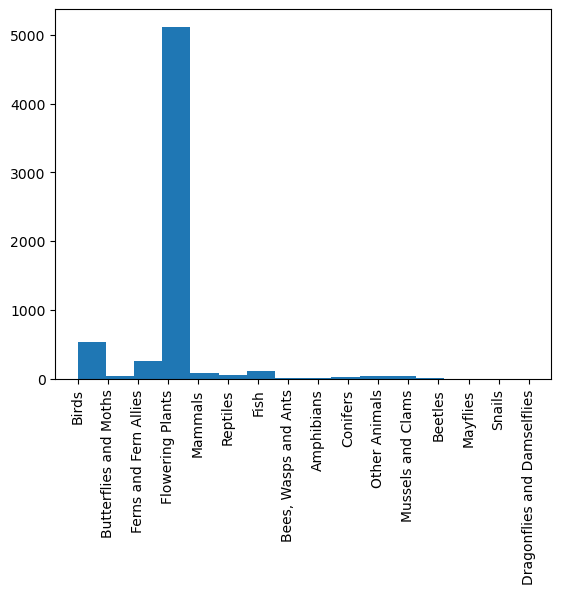

In [34]:
plt.hist(df['Taxonomic Group'], bins=16) 
plt.xticks(rotation=90)
plt.plot()

The top three groups with the most at risk species are birds, ferns and fern allies, and flowering plants. Is this because of human development? New York is a highly populated state, but there are many areas that are relatively untouched. 

C:\Users\Miranda\AppData\Local\Temp\ipykernel_15408\3796059359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index, rotation=45, ha='right')


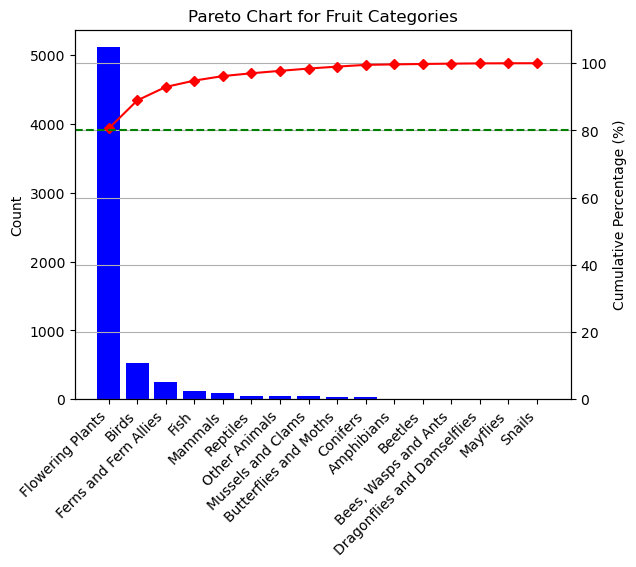

In [67]:
counts = df['Taxonomic Group'].value_counts()
cumulative_perc = counts.cumsum()/counts.sum()*100
fig, ax1 = plt.subplots()
ax1.bar(counts.index, counts.values, color='blue') 
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.plot(counts.index, cumulative_perc, color='red', marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, 110)
ax2.axhline(80, color='green', linestyle='--')
plt.title('Pareto Chart for Fruit Categories')
plt.grid(axis='y')
ax1.set_xticklabels(counts.index, rotation=45, ha='right')
plt.show()

C:\Users\Miranda\AppData\Local\Temp\ipykernel_15408\3618647546.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts_2.index, rotation=45, ha='right')


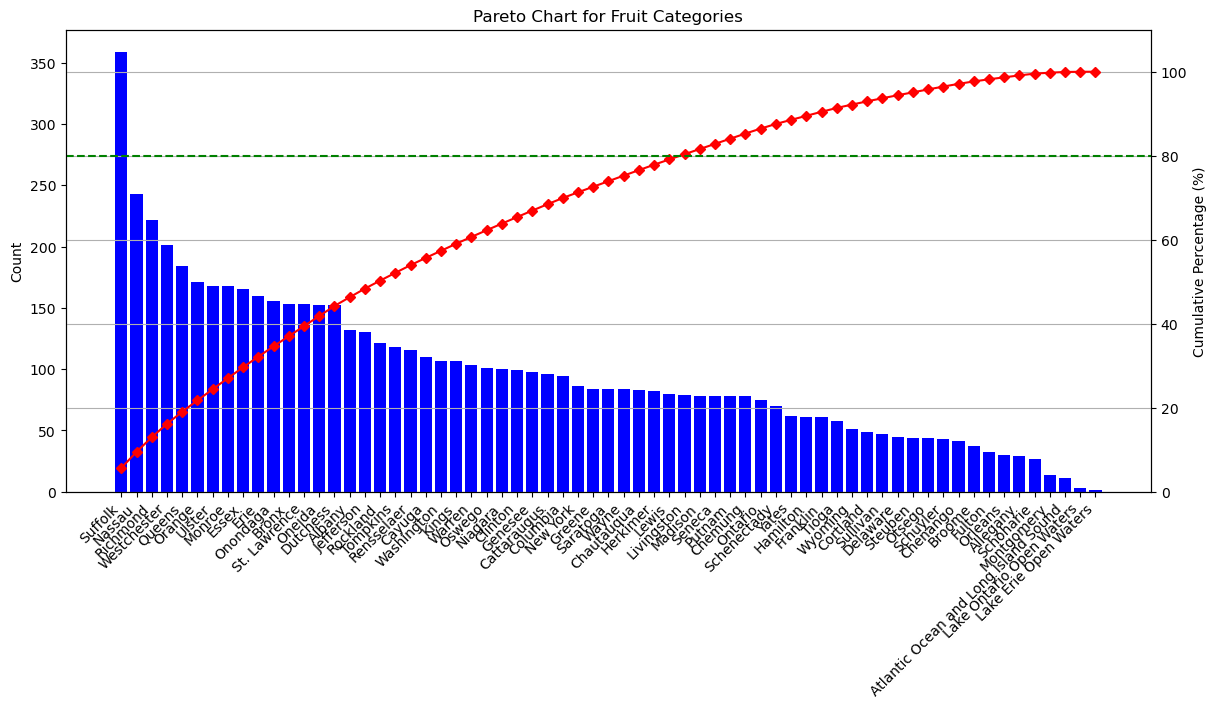

In [73]:
counts_2 = df['County'].value_counts()
cumulative_perc_2 = counts_2.cumsum()/counts_2.sum()*100
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(counts_2.index, counts_2.values, color='blue') 
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.plot(counts_2.index, cumulative_perc_2, color='red', marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, 110)
ax2.axhline(80, color='green', linestyle='--')
plt.title('Pareto Chart for Fruit Categories')
plt.grid(axis='y')
ax1.set_xticklabels(counts_2.index, rotation=45, ha='right')
plt.show()

The first 9 counties account for about 30 percent of the at risk species. Suffolk county has a little less than 10 percent of all the listed species. 

This dataset is categorical with no dates, so time series analysis and numerical graphs (like scatter plots) won't be helpful for visualizing our data. Next we will be making pie charts and swarm plots. 

In [89]:
species = df['Scientific Name'].value_counts()
print(species)

Scientific Name
Myotis septentrionalis      62
Podilymbus podiceps         59
Circus hudsonius            58
Haliaeetus leucocephalus    58
Ixobrychus exilis           56
                            ..
Smilax lasioneura            1
Empetrum atropurpureum       1
Erimystax x-punctatus        1
Crataegus praecox            1
Viola novae-angliae          1
Name: count, Length: 745, dtype: int64


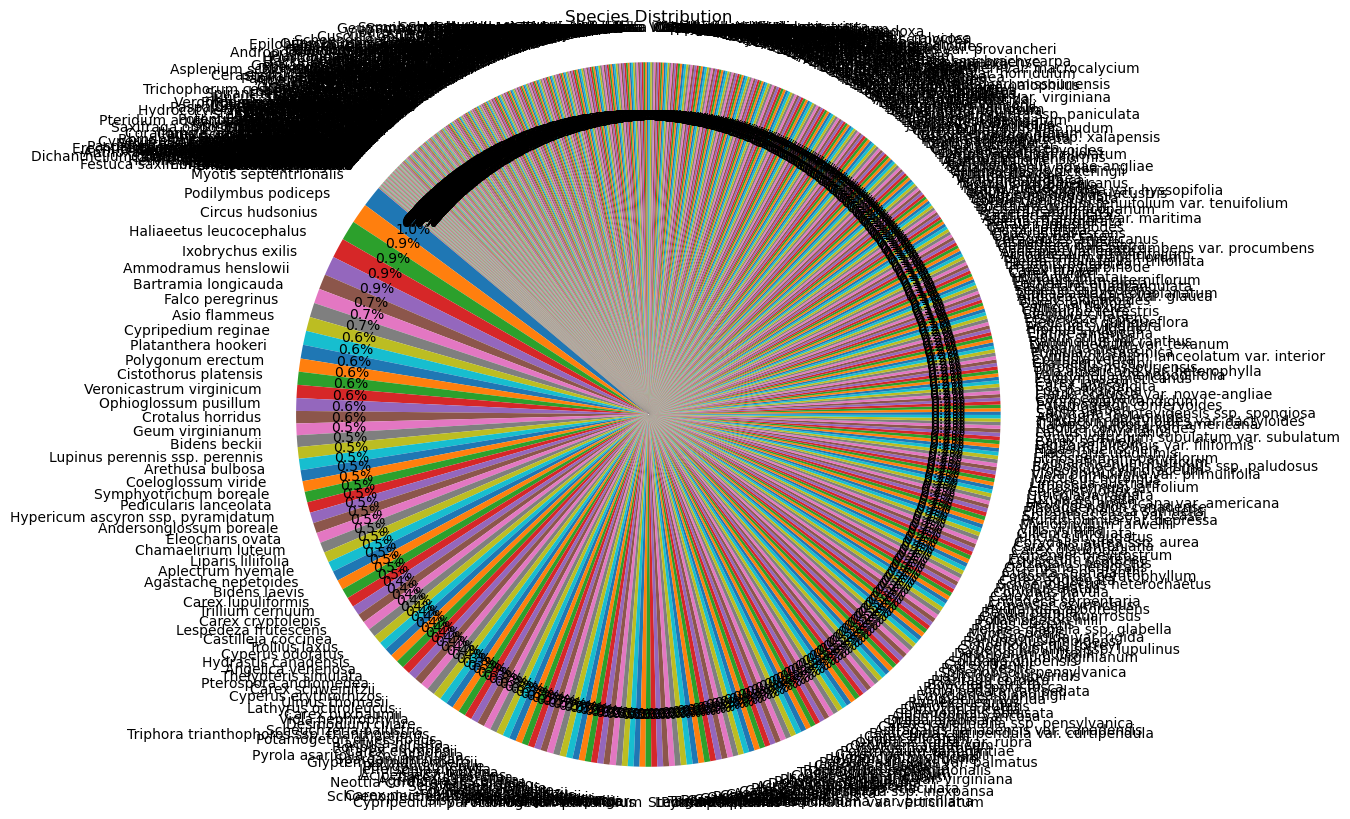

In [86]:
plt.figure(figsize=(10,10))
plt.pie(species, labels = species.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85) 
plt.title('Species Distribution')
plt.axis('equal')
plt.show()

The pie chart is too messy. Let's try some other graphs. 

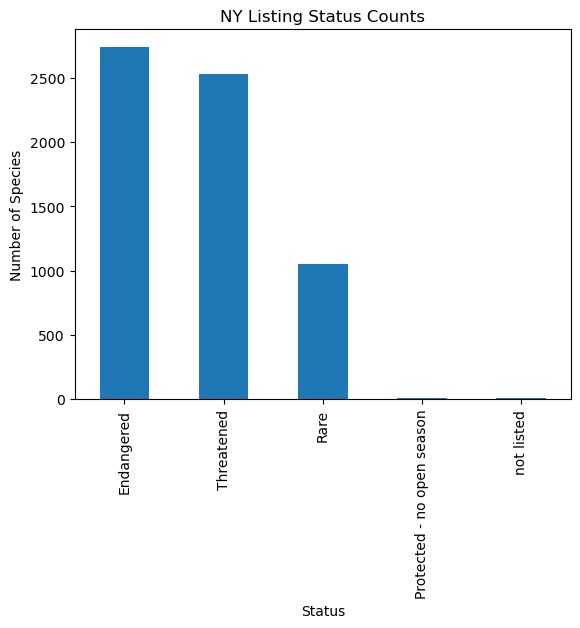

In [181]:
df['NY Listing Status'].value_counts().plot(kind='bar')
plt.title('NY Listing Status Counts')
plt.xlabel('Status')
plt.ylabel('Number of Species')
plt.show()

Most of the species listed are endangered or threatened.

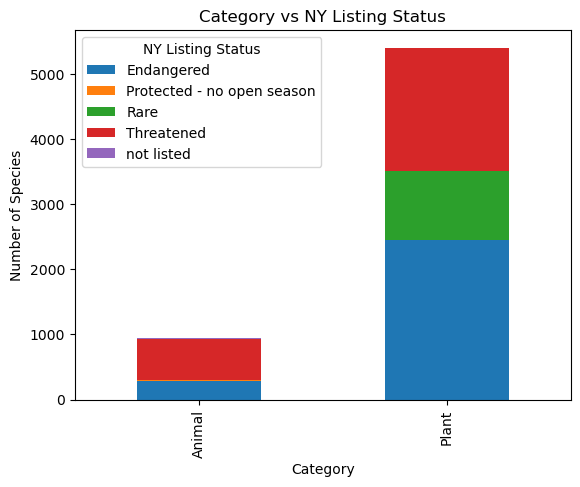

In [186]:
crosstab = pd.crosstab(df['Category'], df['NY Listing Status'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Category vs NY Listing Status')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.show()

We can see that most of our at risk species are plants and are endangered or threatened. For future analysis, I would like to look at manufacturing and population for each county to see if they play a part in the number of endangered and threatened species in the area. I think the counties with a larger number of species sightings have less manufacturing and possibly a lower population, this is because they likely have more wildlide friendly areas. 